Name- Aavighan Sharma  CSEAIML SEC-A 202401100400002  
Topic- Identify Fake Job Postings

In [13]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("All libraries imported successfully!")


All libraries imported successfully!


In [15]:
# 2. Load and Inspect Data
try:
    data = pd.read_csv('/content/fake_jobs.csv')
    print("Dataset loaded successfully!\n")
    display(data.head())
    display(data.info())
    display(data['is_fake'].value_counts())
except FileNotFoundError:
    print("Error: File not found. Please upload 'fake_jobs.csv'")


Dataset loaded successfully!



,title_length,description_length,has_company_profile,is_fake
0,72,740,1,yes
1,95,476,0,no
2,60,662,1,yes
3,34,317,0,no
4,67,884,0,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title_length         100 non-null    int64 
 1   description_length   100 non-null    int64 
 2   has_company_profile  100 non-null    int64 
 3   is_fake              100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


None

,count
is_fake,
no,52
yes,48


In [16]:
# 3. Data Preprocessing
if 'data' in locals():
    data['is_fake'] = data['is_fake'].map({'yes': 1, 'no': 0})
    print("Missing values:")
    display(data.isnull().sum())
    data['title_desc_ratio'] = data['title_length'] / data['description_length']
    print("\nPreprocessing done!")
    display(data.head())
else:
    print("Error: Data not loaded.")


Missing values:


,0
title_length,0
description_length,0
has_company_profile,0
is_fake,0



Preprocessing done!


,title_length,description_length,has_company_profile,is_fake,title_desc_ratio
0,72,740,1,1,0.097297
1,95,476,0,0,0.199580
2,60,662,1,1,0.090634
3,34,317,0,0,0.107256
4,67,884,0,1,0.075792


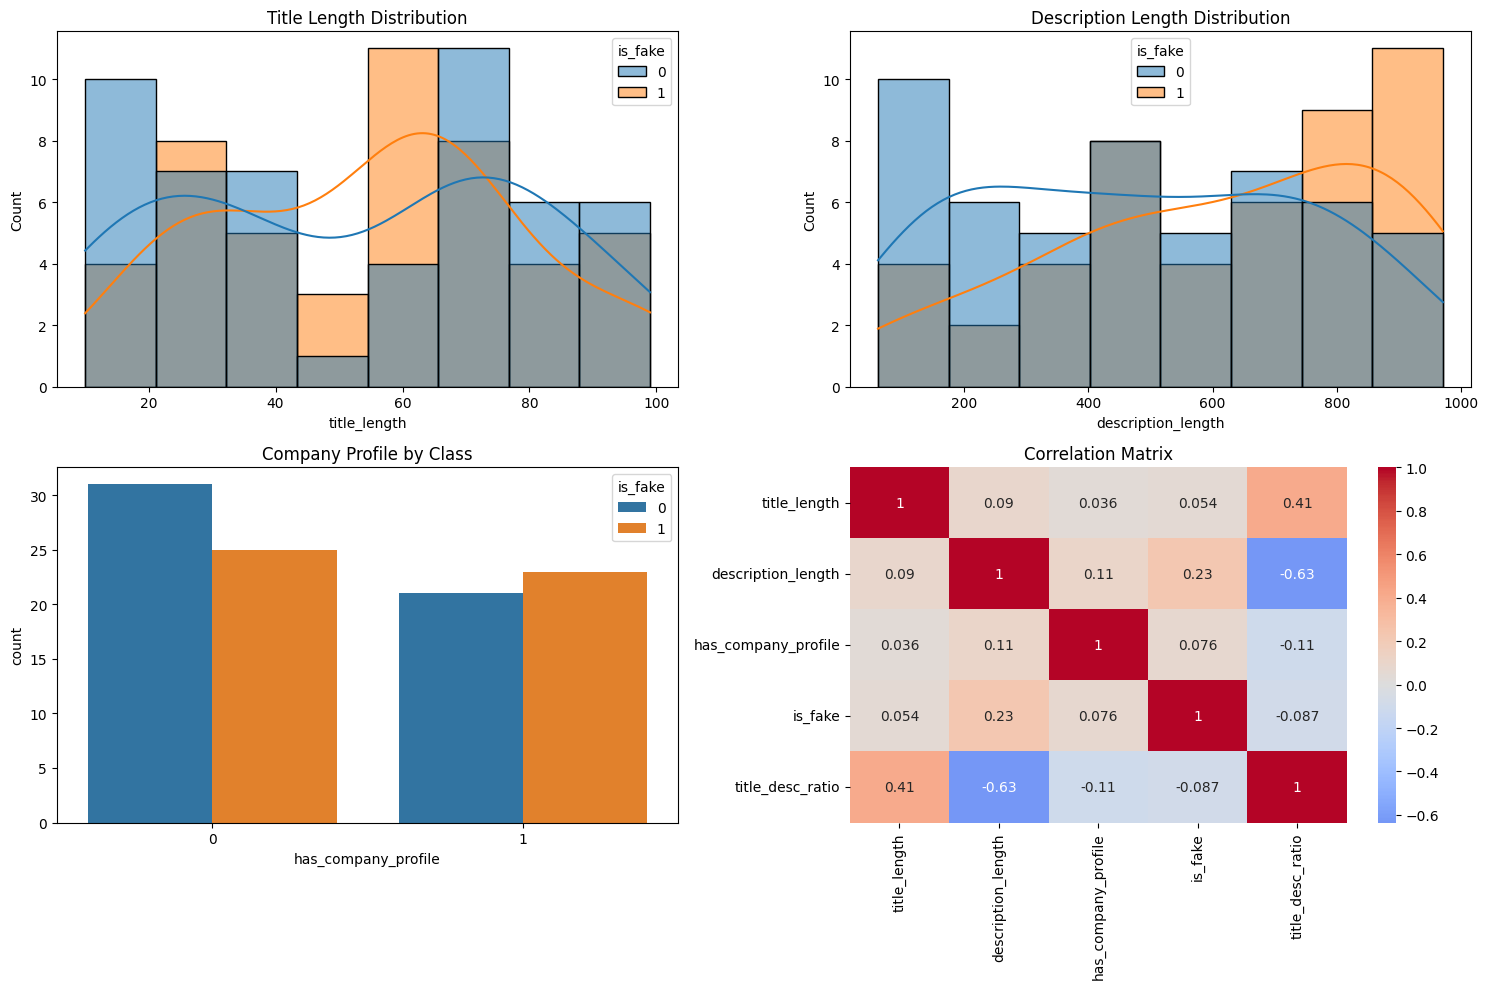

In [17]:
# 4. Exploratory Data Analysis
if 'data' in locals():
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(data=data, x='title_length', hue='is_fake', kde=True)
    plt.title('Title Length Distribution')

    plt.subplot(2, 2, 2)
    sns.histplot(data=data, x='description_length', hue='is_fake', kde=True)
    plt.title('Description Length Distribution')

    plt.subplot(2, 2, 3)
    sns.countplot(data=data, x='has_company_profile', hue='is_fake')
    plt.title('Company Profile by Class')

    plt.subplot(2, 2, 4)
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Data not loaded.")


In [18]:
# 5. Prepare Data for Modeling
if 'data' in locals():
    X = data.drop('is_fake', axis=1)
    y = data['is_fake']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Data ready!")
    print(f"Train shape: {X_train_scaled.shape}, Test shape: {X_test_scaled.shape}")
else:
    print("Error: Data not prepared.")


Data ready!
Train shape: (70, 4), Test shape: (30, 4)


In [19]:
# 6. Train Random Forest Model
if 'X_train_scaled' in locals():
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    print("Model trained!")

    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    display(feature_imp)
else:
    print("Error: Training data missing.")


Model trained!


,Feature,Importance
3,title_desc_ratio,0.343273
0,title_length,0.313002
1,description_length,0.292645
2,has_company_profile,0.051080


Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.50      0.46        12
           1       0.62      0.56      0.59        18

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.52        30
weighted avg       0.55      0.53      0.54        30

Accuracy: 0.5333


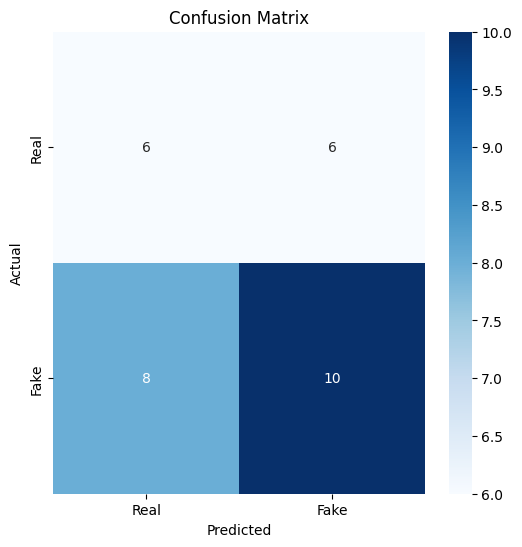

In [20]:
# 7. Model Evaluation
if 'rf_model' in locals():
    y_pred = rf_model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Real', 'Fake'],
                yticklabels=['Real', 'Fake'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
else:
    print("Error: Model not trained.")


<ipython-input-21-bcf945dba627>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp, x='Importance', y='Feature', palette='viridis')


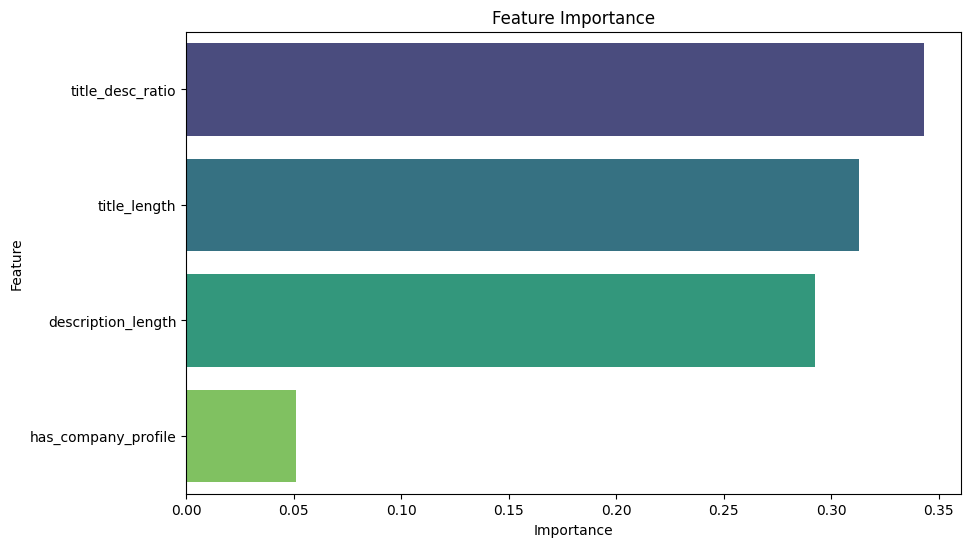

In [21]:
# 8. Feature Importance Visualization
if 'rf_model' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_imp, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Error: Model not trained.")
